In [1]:
import numpy as np
from testbed import TestBed
from experiment import BanditExperiment
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


0.9025503325778643


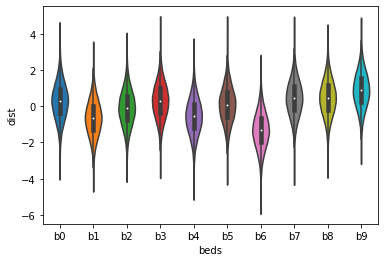

In [3]:
testbed10 = TestBed(10, 1993)
print(np.max(testbed10.mu))
dist = [testbed10.get_dist(i, size=50000) for i in range(10)]
beds = [np.full_like(dist[i], f"b{i}", dtype=object) for i in range(10)]
df = pd.DataFrame({"beds": np.concatenate(beds), "dist": np.concatenate(dist)})
sns.violinplot(x=df["beds"], y=df["dist"], width=0.5, saturation=0.9)
plt.savefig("plots/violin-plot.svg")

In [4]:
def do_single_run(num_bandits, steps, epsilon, alpha, seed1, seed2):
    testbed = TestBed(num_bandits, seed1)
    epg = BanditExperiment(epsilon, testbed, alpha, seed2)
    return epg.run(steps), np.max(testbed.mu)


def avg_runs(num_bandits, num_runs, steps, epsilon, alpha, seed, workers=1):
    rng = np.random.default_rng(seed)
    rewards, max_expected_reward = zip(*Parallel(n_jobs=workers)(
        delayed(do_single_run)(
            num_bandits, steps, epsilon, alpha, rng.integers(10000), rng.integers(10000)
        )
        for _ in range(num_runs)
    ))
    return np.mean(np.array(rewards), axis=0), np.mean(np.array(max_expected_reward), axis=0)


### Study behavior of $\epsilon$

In [5]:
rewards_epsi_0_1, max_q_0_1 = avg_runs(
    num_bandits=10,
    num_runs=5000,
    steps=1000,
    epsilon=0.1,
    alpha=None,
    seed=1993,
    workers=5,
)
rewards_epsi_0_01, max_q_0_01 = avg_runs(
    num_bandits=10,
    num_runs=5000,
    steps=1000,
    epsilon=0.01,
    alpha=None,
    seed=1993,
    workers=5,
)
rewards_epsi_0, max_q_0 = avg_runs(
    num_bandits=10,
    num_runs=5000,
    steps=1000,
    epsilon=0,
    alpha=None,
    seed=1993,
    workers=5,
)


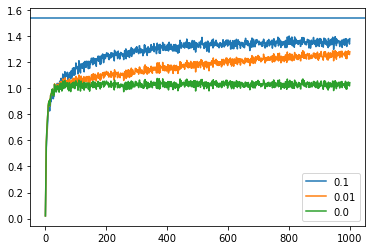

In [12]:
plt.plot(rewards_epsi_0_1, label = "0.1")
plt.plot(rewards_epsi_0_01, label = "0.01")
plt.plot(rewards_epsi_0, label = "0.0")
plt.axhline(max_q_0_01)
# plt.axhline(max_q_0_1)
# plt.axhline(max_q_0)
plt.legend()
plt.savefig("plots/epsilon.svg")
plt.show()

### Study behavior of relaxation ($\alpha$)

In [7]:
rewards_epsi_0_01_var_alp, max_q_0_01 = avg_runs(
    num_bandits=10,
    num_runs=5000,
    steps=1000,
    epsilon=0.01,
    alpha=None,
    seed=1993,
    workers=5,
)

rewards_epsi_0_01_fixed_alp, max_q_0_01 = avg_runs(
    num_bandits=10,
    num_runs=5000,
    steps=1000,
    epsilon=0.01,
    alpha=0.01,
    seed=1993,
    workers=5,
)

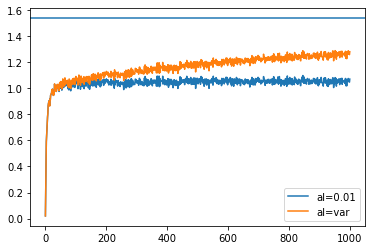

In [13]:
plt.plot(rewards_epsi_0_01_fixed_alp, label = "al=0.01")
plt.plot(rewards_epsi_0_01_var_alp, label = "al=var")
plt.axhline(max_q_0_01)
plt.legend()
plt.savefig("plots/alpha.svg")
plt.show()